In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
path = '/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project /P06:Log_KNN_SVM/2:IrisFlowerDataset.csv'
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df['Species'].value_counts()

Iris-setosa        100
Iris-versicolor    100
Iris-virginica     100
Name: Species, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             300 non-null    int64  
 1   SepalLengthCm  300 non-null    float64
 2   SepalWidthCm   300 non-null    float64
 3   PetalLengthCm  300 non-null    float64
 4   PetalWidthCm   300 non-null    float64
 5   Species        300 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


In [41]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,5.843333,3.054000,3.758667,1.198667
std,86.746758,0.826680,0.432869,1.761467,0.761883
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,75.750000,5.100000,2.800000,1.600000,0.300000
50%,150.500000,5.800000,3.000000,4.350000,1.300000
75%,225.250000,6.400000,3.300000,5.100000,1.800000
max,300.000000,7.900000,4.400000,6.900000,2.500000


In [42]:
df.corr()

<ipython-input-42-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.358332,-0.198861,0.441366,0.449872
SepalLengthCm,0.358332,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.198861,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.441366,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.449872,0.817954,-0.356544,0.962757,1.000000


<ipython-input-43-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

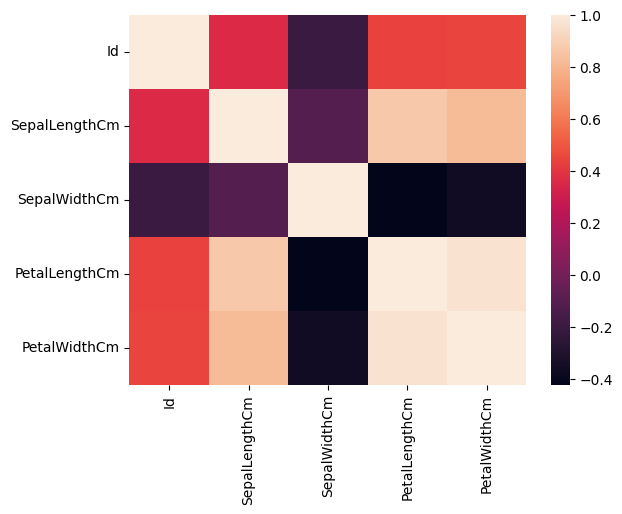

In [43]:
sns.heatmap(df.corr())

In [44]:
col = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [45]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [47]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['Species']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=16)

In [48]:
X.shape,y.shape

((300, 4), (300,))

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

#prediction
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

test_Accuracy = accuracy_score(y_test,ytest_pred)
train_Accuracy = accuracy_score(y_train,ytrain_pred)
test_crossValidation = cross_val_score(model,X_test,ytest_pred,cv=5,scoring='accuracy').mean()
print("test_Accuracy : ",test_Accuracy )
print("train_Accuracy : ",train_Accuracy )
print("test_crossValidation : ",test_crossValidation )

test_Accuracy :  0.9666666666666667
train_Accuracy :  1.0
test_crossValidation :  0.9833333333333332


In [66]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5]}

best_model = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

best_model.fit(X_train,y_train)
best_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [79]:
best_model.best_estimator_.feature_importances_
imp_features = pd.DataFrame(data=best_model.best_estimator_.feature_importances_,index=X.columns,columns=['Imp_Featre'])
imp_features = imp_features[imp_features['Imp_Featre']>0].index.to_list()
imp_features

['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

In [80]:
X_new =X[imp_features]
X_train, X_test, y_train, y_test =train_test_split(X_new,y,test_size=0.2,random_state=16)

In [81]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(X_train,y_train)

#prediction
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

test_Accuracy = accuracy_score(y_test,ytest_pred)
train_Accuracy = accuracy_score(y_train,ytrain_pred)
test_crossValidation = cross_val_score(model,X_test,ytest_pred,cv=5,scoring='accuracy').mean()
print("test_Accuracy : ",test_Accuracy )
print("train_Accuracy : ",train_Accuracy )
print("test_crossValidation : ",test_crossValidation )

test_Accuracy :  0.9666666666666667
train_Accuracy :  1.0
test_crossValidation :  0.9833333333333332


In [82]:
confusion_matrix(y_test,ytest_pred)

array([[21,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 18]])

In [84]:
print(classification_report(y_test,ytest_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.90      1.00      0.95        18

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

#prediction
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

test_Accuracy = accuracy_score(y_test,ytest_pred)
train_Accuracy = accuracy_score(y_train,ytrain_pred)
test_crossValidation = cross_val_score(model,X_test,ytest_pred,cv=5,scoring='accuracy').mean()
print("test_Accuracy : ",test_Accuracy )
print("train_Accuracy : ",train_Accuracy )
print("test_crossValidation : ",test_crossValidation )


test_Accuracy :  0.9666666666666667
train_Accuracy :  1.0
test_crossValidation :  1.0


In [88]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier()
param_grid = {'n_estimators':list(range(1,100))}

best_model = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

best_model.fit(X_train,y_train)
best_model.best_params_

{'n_estimators': 21}

In [93]:
best_model.best_estimator_.feature_importances_
imp_features = pd.DataFrame(data=best_model.best_estimator_.feature_importances_,index=X_new.columns,columns=['Imp_Featre'])
imp_features = imp_features[imp_features['Imp_Featre']>0].index.to_list()
imp_features

['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

In [94]:
X_new =X[imp_features]
X_train, X_test, y_train, y_test =train_test_split(X_new,y,test_size=0.2,random_state=16)

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=21)
model.fit(X_train,y_train)

#prediction
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

test_Accuracy = accuracy_score(y_test,ytest_pred)
train_Accuracy = accuracy_score(y_train,ytrain_pred)
test_crossValidation = cross_val_score(model,X_test,ytest_pred,cv=5,scoring='accuracy').mean()
print("test_Accuracy : ",test_Accuracy )
print("train_Accuracy : ",train_Accuracy )
print("test_crossValidation : ",test_crossValidation )

test_Accuracy :  0.9666666666666667
train_Accuracy :  1.0
test_crossValidation :  0.9833333333333332
